In [1]:
##Importing libraries and modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the dataset

df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## display stats about data

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
## display basic information about datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the data

In [7]:
## check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data analysis

<AxesSubplot:>

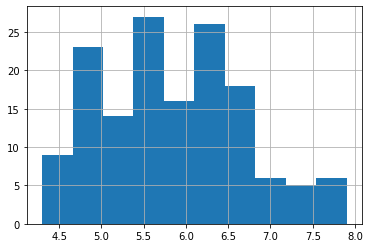

In [8]:
df.sepal_length.hist()

<AxesSubplot:>

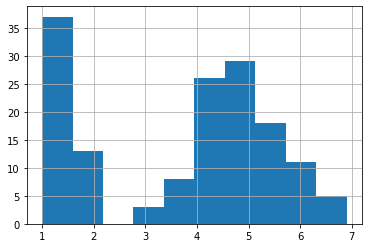

In [9]:
df.petal_length.hist()

<AxesSubplot:>

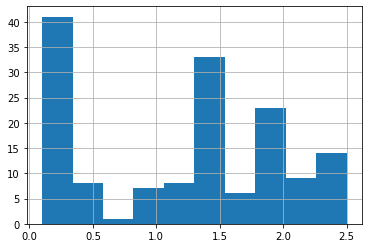

In [10]:
df.petal_width.hist()

<AxesSubplot:>

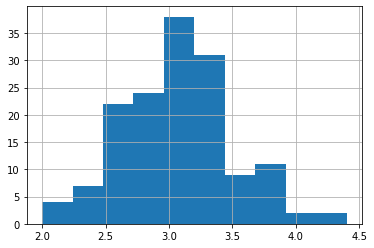

In [11]:
df.sepal_width.hist()

In [12]:
##scatterplot for each class

colors=['red','orange','blue']
species=['Iris-virginica' ,'Iris-versicolor','Iris-setosa' ]



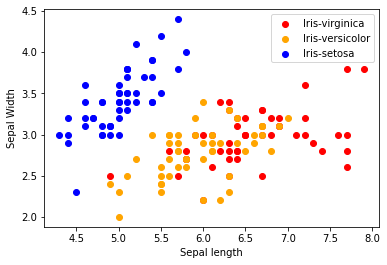

In [13]:
for i in range(3):
    x=df[df.species==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.legend()

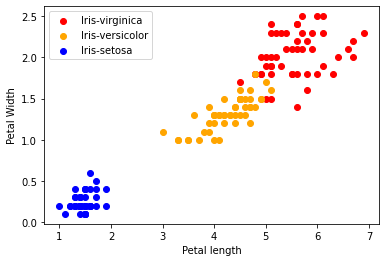

In [14]:
for i in range(3):
    x=df[df.species==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend()

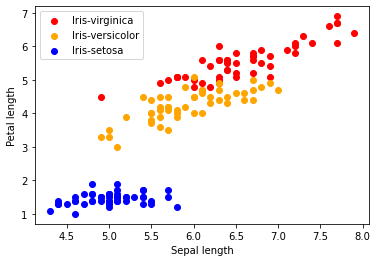

In [15]:
for i in range(3):
    x=df[df.species==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()

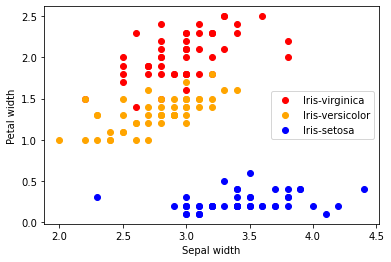

In [16]:
for i in range(3):
    x=df[df.species==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend()

# Correlation Matrix

In [17]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

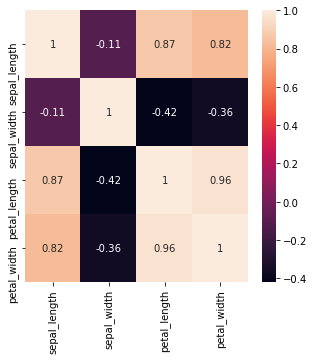

In [18]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)

# Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df.species=le.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [21]:
from sklearn.model_selection import train_test_split  
#train=70%
#test=30%

In [22]:
X=df.drop(columns=['species'])
Y=df.species

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30)

In [23]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


# Random forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using training sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [30]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9111111111111111
